# Projeto de Priorização de Capex da Engenharia Novos Negócios

In [122]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [123]:
CT = datetime.now().strftime("%d-%m-%Y_%Hh%Mm%Ss")

In [124]:
INPUT = 'MANDACARU_INPUT_PRIORIZACAO_DS'

In [125]:
df = pd.read_excel(INPUT + '.xlsx', sheet_name='Planilha1')

EXPLORAÇÃO DE DADOS E AJUSTE DE CADAS DECIMAIS

In [126]:
df.dtypes

COD_MUN             object
BLOCO                int64
BACIA               object
ANO                  int64
FLUXO              float64
IC_E               float64
ECO_POT            float64
ECO_INCR_CONCED    float64
BACIA_PREDEC        object
META_MUN           float64
META_BLOCO         float64
META_GLOBAL        float64
EXEC_PREDEC          int64
dtype: object

In [127]:
# Dicionário mapeando as colunas ao número de casas decimais
colunas_arredondamento = {
    'FLUXO': 2,
    'IC_E': 4,
    'ECO_POT': 2,
    'ECO_INCR_CONCED': 2,
    'META_MUN': 2,
    'META_BLOCO': 2,
    'META_GLOBAL': 2}

# Aplicando o arredondamento com base no dicionário
for coluna, decimais in colunas_arredondamento.items():
    df[coluna] = df[coluna].round(decimais)

df

,COD_MUN,BLOCO,BACIA,ANO,FLUXO,IC_E,ECO_POT,ECO_INCR_CONCED,BACIA_PREDEC,META_MUN,META_BLOCO,META_GLOBAL,EXEC_PREDEC
0,ARA,2,ARA-BAC-001,0,0.00,0.000,1561.93,0.0,NaN,0.00,0.20,0.20,0
1,ARA,2,ARA-BAC-001,1,-570969.97,0.075,1570.15,0.0,NaN,0.00,0.20,0.20,0
2,ARA,2,ARA-BAC-001,2,-11263371.04,1.000,1577.03,0.0,NaN,0.00,0.20,0.20,0
3,ARA,2,ARA-BAC-001,3,1779051.43,1.000,1582.02,0.0,NaN,0.22,0.20,0.20,0
4,ARA,2,ARA-BAC-001,4,1822479.22,1.000,1587.46,0.0,NaN,0.22,0.47,0.47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,UMB,2,UMB-BAC-001,31,7201147.46,1.000,7716.07,0.0,NaN,0.90,0.90,0.90,0
644,UMB,2,UMB-BAC-001,32,7225729.67,1.000,7761.60,0.0,NaN,0.90,0.90,0.90,0
645,UMB,2,UMB-BAC-001,33,7264026.39,1.000,7807.52,0.0,NaN,0.90,0.90,0.90,0
646,UMB,2,UMB-BAC-001,34,7292619.73,1.000,7853.72,0.0,NaN,0.90,0.90,0.90,0


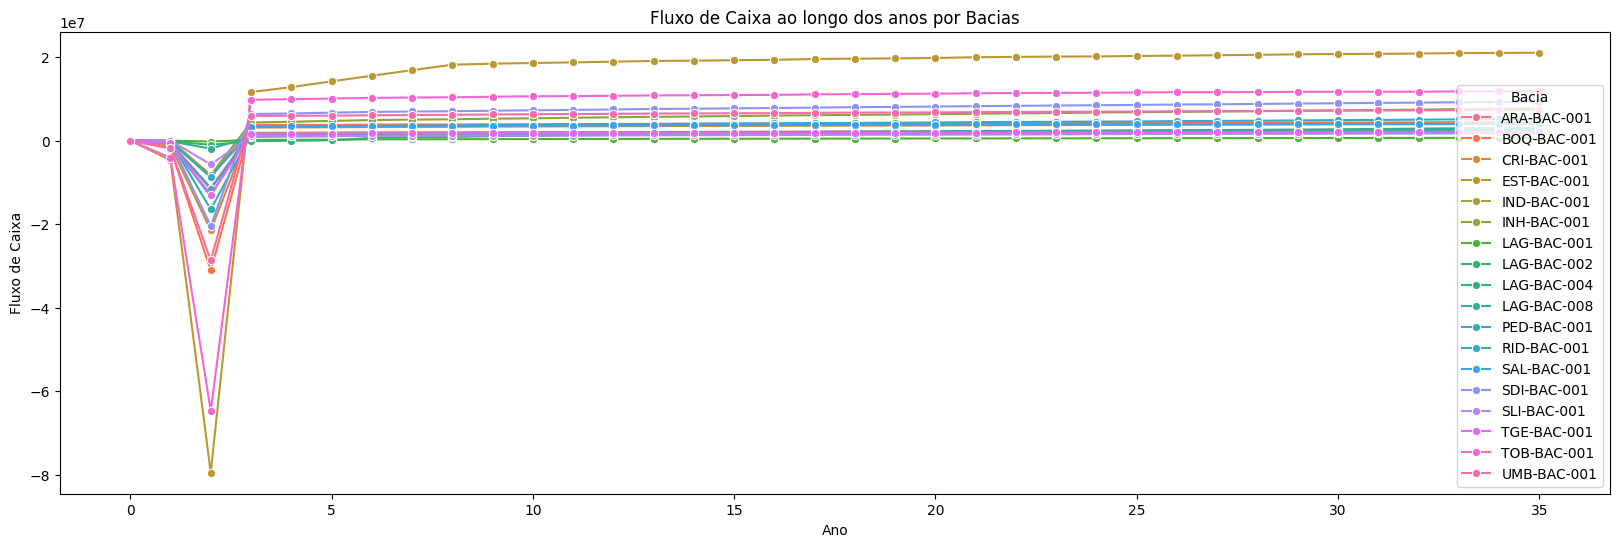

In [128]:
# Configurando o gráfico
plt.figure(figsize=(20, 6))

# Usando seaborn para criar o gráfico de linhas
sns.lineplot(data=df, x='ANO', y='FLUXO', hue='BACIA', marker='o')

# Adicionando título e rótulos aos eixos
plt.title('Fluxo de Caixa ao longo dos anos por Bacias')
plt.xlabel('Ano')
plt.ylabel('Fluxo de Caixa')

# Exibindo a legenda
plt.legend(title='Bacia')

# Mostrando o gráfico
plt.show()

CÁLCULOS DE TIR E VPL

In [129]:
# Taxa de desconto para o VPL
taxa_desconto = 0.1

# Função para calcular o VPL
def calcular_vpl(taxa_desconto, fluxos):
    return npf.npv(taxa_desconto, fluxos)

# Função para calcular a TIR
def calcular_tir(fluxos):
    tir = npf.irr(fluxos)
    if np.isnan(tir):
        return 0  # Retorna 0 se a TIR for NaN devido a um fluxo negativo em todos os anos
    return npf.irr(fluxos)

# Agrupar por 'BACIA' e calcular TIR e VPL para cada grupo
df_VPL_TIR = df.groupby(['COD_MUN','BLOCO','BACIA']).apply(
    lambda x: pd.Series({
        'VPL': calcular_vpl(taxa_desconto, x['FLUXO'].values),
        'TIR': calcular_tir(x['FLUXO'].values),
    })
).reset_index()

df_VPL_TIR['VPL'] = round((df_VPL_TIR['VPL']),2)
df_VPL_TIR

,COD_MUN,BLOCO,BACIA,VPL,TIR
0,ARA,2,ARA-BAC-001,5919379.08,0.161122
1,BOQ,2,BOQ-BAC-001,3687399.88,0.114623
2,CRI,2,CRI-BAC-001,7837708.33,0.143291
3,EST,2,EST-BAC-001,65625451.38,0.186574
4,IND,2,IND-BAC-001,8529919.46,0.216613
5,INH,2,INH-BAC-001,36071156.50,0.566037
6,LAG,2,LAG-BAC-001,2537851.28,0.748310
7,LAG,2,LAG-BAC-002,7301804.02,0.316452
8,LAG,2,LAG-BAC-004,11049663.00,0.494949
9,LAG,2,LAG-BAC-008,145820.71,0.101098


RANKING ECONOMICO POR TIR E VPL

In [130]:
# Ordenar os dados por VPL e TIR pra cada COD_MUN
df_sorted = df_VPL_TIR.copy()

# Criar a coluna de ranking para cada grupo de COD_MUN
df_sorted['Rank_VPL'] = df_sorted.groupby('BLOCO')['VPL'].rank(ascending=False, method='first').astype(int)
df_sorted['Rank_TIR'] = df_sorted.groupby('BLOCO')['TIR'].rank(ascending=False, method='first').astype(int)

df_sorted

,COD_MUN,BLOCO,BACIA,VPL,TIR,Rank_VPL,Rank_TIR
0,ARA,2,ARA-BAC-001,5919379.08,0.161122,12,12
1,BOQ,2,BOQ-BAC-001,3687399.88,0.114623,14,17
2,CRI,2,CRI-BAC-001,7837708.33,0.143291,10,14
3,EST,2,EST-BAC-001,65625451.38,0.186574,1,11
4,IND,2,IND-BAC-001,8529919.46,0.216613,9,8
5,INH,2,INH-BAC-001,36071156.50,0.566037,3,2
6,LAG,2,LAG-BAC-001,2537851.28,0.748310,16,1
7,LAG,2,LAG-BAC-002,7301804.02,0.316452,11,6
8,LAG,2,LAG-BAC-004,11049663.00,0.494949,8,3
9,LAG,2,LAG-BAC-008,145820.71,0.101098,18,18


In [131]:
# Função para criar uma chave de ordenação baseada em TIR e VPL
def chave_ordenacao(row):
    if row['TIR'] >= 0.1:
        # Priorizar a TIR para valores maiores ou iguais a 0.1
        return (-row['TIR'], -row['VPL'])  # Usamos VPL para desempate
    else:
        # Priorizar VPL se TIR for menor que 0.1
        return (0, -row['VPL'])  # Colocamos 0 para TIR como "neutra" e usar VPL como chave

# Aplicar o método de ordenação
df_sorted['chave_ordenacao'] = df_sorted.apply(chave_ordenacao, axis=1)

# Ordenar pela chave de ordenação criada
df_sorted_fin = df_sorted.sort_values(by='chave_ordenacao', ascending=True)

# Criar o ranking para cada grupo de BLOCO
df_sorted_fin['Rank_Economico'] = df_sorted_fin.groupby('BLOCO').cumcount() + 1
df_sorted_fin = df_sorted_fin.drop(columns='chave_ordenacao')

# Organizar os dados por BLOCO e ranking
df_sorted_fin = df_sorted_fin.sort_values(by=['BLOCO', 'Rank_Economico'])

df_sorted_fin

,COD_MUN,BLOCO,BACIA,VPL,TIR,Rank_VPL,Rank_TIR,Rank_Economico
6,LAG,2,LAG-BAC-001,2537851.28,0.748310,16,1,1
5,INH,2,INH-BAC-001,36071156.50,0.566037,3,2,2
8,LAG,2,LAG-BAC-004,11049663.00,0.494949,8,3,3
11,RID,2,RID-BAC-001,22676357.06,0.374266,6,4,4
13,SDI,2,SDI-BAC-001,40698987.63,0.324671,2,5,5
7,LAG,2,LAG-BAC-002,7301804.02,0.316452,11,6,6
12,SAL,2,SAL-BAC-001,16665786.67,0.243209,7,7,7
4,IND,2,IND-BAC-001,8529919.46,0.216613,9,8,8
14,SLI,2,SLI-BAC-001,4998541.51,0.199626,13,9,9
17,UMB,2,UMB-BAC-001,24723831.42,0.198995,5,10,10


RANKING FÍSICO (PARA BLOCO E MUNICÍPIO)

In [132]:
# Fazendo o merge de df_sorted_fis com df para capturar a coluna BACIA_PREDEC
df_sorted_fis = pd.merge(
    df_sorted_fin, 
    df[['BACIA', 'BACIA_PREDEC']].drop_duplicates(),  # Garante que não haja duplicatas no merge
    on='BACIA', 
    how='left'
)

# Inicializa o Rank_Bloco com o ranking financeiro
df_sorted_fis['Rank_Bloco'] = df_sorted_fis['Rank_Economico']  

# Função para construir a cadeia de predecessoras
def construir_cadeia(df, bacia):
    cadeia = []
    bacia_predec = df.loc[df['BACIA'] == bacia, 'BACIA_PREDEC'].values[0]
    while pd.notna(bacia_predec):
        cadeia.append(bacia_predec)
        # Avança para a próxima predecessora
        bacia_predec = df.loc[df['BACIA'] == bacia_predec, 'BACIA_PREDEC'].values[0]
    return cadeia

# Função para reordenar o Rank_Bloco com base nas predecessoras
def ajustar_Rank_Bloco(df):
    ordem_fisica = []
    ja_classificadas = set()

    # Itera pelo DataFrame ordenado por Rank_Economico (ordenado antes de chamar a função)
    for idx, row in df.iterrows():
        bacia = row['BACIA']

        if bacia not in ja_classificadas:
            # Constrói a cadeia de predecessoras
            cadeia_predecessoras = construir_cadeia(df, bacia)

            # Primeiro adiciona as predecessoras que ainda não foram classificadas
            for predec in reversed(cadeia_predecessoras):  # Reverso para adicionar na ordem correta
                if predec not in ja_classificadas:
                    ordem_fisica.append(predec)
                    ja_classificadas.add(predec)

            # Depois adiciona a bacia atual
            ordem_fisica.append(bacia)
            ja_classificadas.add(bacia)

    return ordem_fisica

# Ajusta o Rank_Bloco com base na cadeia de predecessoras
ordem_fisica = ajustar_Rank_Bloco(df_sorted_fis)

# Agora, criar uma nova coluna de Rank_Bloco baseada na nova ordem
df_sorted_fis['Rank_Bloco'] = df_sorted_fis['BACIA'].apply(lambda x: ordem_fisica.index(x) + 1)

# Desempatar o novo Rank_Bloco com o Rank_Economico (removendo a coluna temporária)
df_sorted_fis['Rank_Bloco'] = df_sorted_fis.groupby('BLOCO')['Rank_Bloco'].rank(method='first').astype(int)

# Inicializa o Rank_Mun com o Rank_Economico
df_sorted_fis['Rank_Mun'] = df_sorted_fis['Rank_Bloco']

# Ajusta a função de rankeamento para trabalhar com municípios
df_sorted_fis['Rank_Mun'] = df_sorted_fis.groupby('COD_MUN')['Rank_Mun'].rank(method='first').astype(int)

# Após ajustar os Rank_Bloco, reordenar o DataFrame de acordo com ele
df_sorted_fis = df_sorted_fis.sort_values(by=['BLOCO', 'Rank_Bloco']).reset_index(drop=True)

# Exibir o resultado final
df_sorted_fis


,COD_MUN,BLOCO,BACIA,VPL,TIR,Rank_VPL,Rank_TIR,Rank_Economico,BACIA_PREDEC,Rank_Bloco,Rank_Mun
0,LAG,2,LAG-BAC-002,7301804.02,0.316452,11,6,6,NaN,1,1
1,LAG,2,LAG-BAC-001,2537851.28,0.748310,16,1,1,LAG-BAC-002,2,2
2,INH,2,INH-BAC-001,36071156.50,0.566037,3,2,2,NaN,3,1
3,LAG,2,LAG-BAC-004,11049663.00,0.494949,8,3,3,LAG-BAC-002,4,3
4,RID,2,RID-BAC-001,22676357.06,0.374266,6,4,4,NaN,5,1
5,SDI,2,SDI-BAC-001,40698987.63,0.324671,2,5,5,NaN,6,1
6,SAL,2,SAL-BAC-001,16665786.67,0.243209,7,7,7,NaN,7,1
7,IND,2,IND-BAC-001,8529919.46,0.216613,9,8,8,NaN,8,1
8,SLI,2,SLI-BAC-001,4998541.51,0.199626,13,9,9,NaN,9,1
9,UMB,2,UMB-BAC-001,24723831.42,0.198995,5,10,10,NaN,10,1


TRAZ O RANKING PARA A BASE

In [133]:
df2 = pd.merge(
    df,
    df_sorted_fis[['BACIA','TIR','Rank_Bloco','Rank_Mun']],
    on='BACIA',
    how='left'
)
df2['TIR'] = round(df2['TIR'], 3)
df2

,COD_MUN,BLOCO,BACIA,ANO,FLUXO,IC_E,ECO_POT,ECO_INCR_CONCED,BACIA_PREDEC,META_MUN,META_BLOCO,META_GLOBAL,EXEC_PREDEC,TIR,Rank_Bloco,Rank_Mun
0,ARA,2,ARA-BAC-001,0,0.00,0.000,1561.93,0.0,NaN,0.00,0.20,0.20,0,0.161,12,1
1,ARA,2,ARA-BAC-001,1,-570969.97,0.075,1570.15,0.0,NaN,0.00,0.20,0.20,0,0.161,12,1
2,ARA,2,ARA-BAC-001,2,-11263371.04,1.000,1577.03,0.0,NaN,0.00,0.20,0.20,0,0.161,12,1
3,ARA,2,ARA-BAC-001,3,1779051.43,1.000,1582.02,0.0,NaN,0.22,0.20,0.20,0,0.161,12,1
4,ARA,2,ARA-BAC-001,4,1822479.22,1.000,1587.46,0.0,NaN,0.22,0.47,0.47,0,0.161,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,UMB,2,UMB-BAC-001,31,7201147.46,1.000,7716.07,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1
644,UMB,2,UMB-BAC-001,32,7225729.67,1.000,7761.60,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1
645,UMB,2,UMB-BAC-001,33,7264026.39,1.000,7807.52,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1
646,UMB,2,UMB-BAC-001,34,7292619.73,1.000,7853.72,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1


CRIAÇÃO DE COLUNAS AUXILIARES

In [134]:
# Filtra df2 para as linhas onde ANO == 0
df_filtered = df2[df2['ANO'] == 0][['BACIA', 'IC_E']].drop_duplicates()

# Faz o merge de df2 com df_filtered para pegar IC_E quando ANO == 0
df2 = pd.merge(df2, df_filtered, on='BACIA', how='left', suffixes=('', '_BAC_APOIO'))

# Renomeia a coluna IC_E_BAC_APOIO para IC_BAC_APOIO
df2.rename(columns={'IC_E_BAC_APOIO': 'IC_BAC_APOIO'}, inplace=True)

df2

,COD_MUN,BLOCO,BACIA,ANO,FLUXO,IC_E,ECO_POT,ECO_INCR_CONCED,BACIA_PREDEC,META_MUN,META_BLOCO,META_GLOBAL,EXEC_PREDEC,TIR,Rank_Bloco,Rank_Mun,IC_BAC_APOIO
0,ARA,2,ARA-BAC-001,0,0.00,0.000,1561.93,0.0,NaN,0.00,0.20,0.20,0,0.161,12,1,0.0
1,ARA,2,ARA-BAC-001,1,-570969.97,0.075,1570.15,0.0,NaN,0.00,0.20,0.20,0,0.161,12,1,0.0
2,ARA,2,ARA-BAC-001,2,-11263371.04,1.000,1577.03,0.0,NaN,0.00,0.20,0.20,0,0.161,12,1,0.0
3,ARA,2,ARA-BAC-001,3,1779051.43,1.000,1582.02,0.0,NaN,0.22,0.20,0.20,0,0.161,12,1,0.0
4,ARA,2,ARA-BAC-001,4,1822479.22,1.000,1587.46,0.0,NaN,0.22,0.47,0.47,0,0.161,12,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,UMB,2,UMB-BAC-001,31,7201147.46,1.000,7716.07,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1,0.0
644,UMB,2,UMB-BAC-001,32,7225729.67,1.000,7761.60,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1,0.0
645,UMB,2,UMB-BAC-001,33,7264026.39,1.000,7807.52,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1,0.0
646,UMB,2,UMB-BAC-001,34,7292619.73,1.000,7853.72,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1,0.0


In [135]:
# Soma a ECO_POT para cada Município
df_filtered = df.groupby(['COD_MUN','ANO']).agg({'ECO_POT':'sum'})

# Faz o merge de df2 com df_filtered para pegar a ECO_POT_MUN
df2 = pd.merge(df2, df_filtered, on=['COD_MUN','ANO'], how='left', suffixes=('', '_MUN'))

df2

,COD_MUN,BLOCO,BACIA,ANO,FLUXO,IC_E,ECO_POT,ECO_INCR_CONCED,BACIA_PREDEC,META_MUN,META_BLOCO,META_GLOBAL,EXEC_PREDEC,TIR,Rank_Bloco,Rank_Mun,IC_BAC_APOIO,ECO_POT_MUN
0,ARA,2,ARA-BAC-001,0,0.00,0.000,1561.93,0.0,NaN,0.00,0.20,0.20,0,0.161,12,1,0.0,1561.93
1,ARA,2,ARA-BAC-001,1,-570969.97,0.075,1570.15,0.0,NaN,0.00,0.20,0.20,0,0.161,12,1,0.0,1570.15
2,ARA,2,ARA-BAC-001,2,-11263371.04,1.000,1577.03,0.0,NaN,0.00,0.20,0.20,0,0.161,12,1,0.0,1577.03
3,ARA,2,ARA-BAC-001,3,1779051.43,1.000,1582.02,0.0,NaN,0.22,0.20,0.20,0,0.161,12,1,0.0,1582.02
4,ARA,2,ARA-BAC-001,4,1822479.22,1.000,1587.46,0.0,NaN,0.22,0.47,0.47,0,0.161,12,1,0.0,1587.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,UMB,2,UMB-BAC-001,31,7201147.46,1.000,7716.07,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1,0.0,7716.07
644,UMB,2,UMB-BAC-001,32,7225729.67,1.000,7761.60,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1,0.0,7761.60
645,UMB,2,UMB-BAC-001,33,7264026.39,1.000,7807.52,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1,0.0,7807.52
646,UMB,2,UMB-BAC-001,34,7292619.73,1.000,7853.72,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1,0.0,7853.72


In [136]:
# Soma a ECO_POT para cada Bloco
df_filtered = df.groupby(['BLOCO','ANO']).agg({'ECO_POT':'sum'})

# Faz o merge de df2 com df_filtered para pegar a ECO_POT_BLOCO
df2 = pd.merge(df2, df_filtered, on=['BLOCO','ANO'], how='left', suffixes=('', '_BLOCO'))

df2

,COD_MUN,BLOCO,BACIA,ANO,FLUXO,IC_E,ECO_POT,ECO_INCR_CONCED,BACIA_PREDEC,META_MUN,META_BLOCO,META_GLOBAL,EXEC_PREDEC,TIR,Rank_Bloco,Rank_Mun,IC_BAC_APOIO,ECO_POT_MUN,ECO_POT_BLOCO
0,ARA,2,ARA-BAC-001,0,0.00,0.000,1561.93,0.0,NaN,0.00,0.20,0.20,0,0.161,12,1,0.0,1561.93,106924.10
1,ARA,2,ARA-BAC-001,1,-570969.97,0.075,1570.15,0.0,NaN,0.00,0.20,0.20,0,0.161,12,1,0.0,1570.15,106828.10
2,ARA,2,ARA-BAC-001,2,-11263371.04,1.000,1577.03,0.0,NaN,0.00,0.20,0.20,0,0.161,12,1,0.0,1577.03,106689.49
3,ARA,2,ARA-BAC-001,3,1779051.43,1.000,1582.02,0.0,NaN,0.22,0.20,0.20,0,0.161,12,1,0.0,1582.02,106352.32
4,ARA,2,ARA-BAC-001,4,1822479.22,1.000,1587.46,0.0,NaN,0.22,0.47,0.47,0,0.161,12,1,0.0,1587.46,105991.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,UMB,2,UMB-BAC-001,31,7201147.46,1.000,7716.07,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1,0.0,7716.07,130890.84
644,UMB,2,UMB-BAC-001,32,7225729.67,1.000,7761.60,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1,0.0,7761.60,131662.21
645,UMB,2,UMB-BAC-001,33,7264026.39,1.000,7807.52,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1,0.0,7807.52,132441.29
646,UMB,2,UMB-BAC-001,34,7292619.73,1.000,7853.72,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1,0.0,7853.72,133222.51


In [137]:
df2['P_ECO_FACT_BAC'] = (df2['ECO_POT'] * df2['IC_BAC_APOIO']) + df2['ECO_INCR_CONCED']

df2

,COD_MUN,BLOCO,BACIA,ANO,FLUXO,IC_E,ECO_POT,ECO_INCR_CONCED,BACIA_PREDEC,META_MUN,META_BLOCO,META_GLOBAL,EXEC_PREDEC,TIR,Rank_Bloco,Rank_Mun,IC_BAC_APOIO,ECO_POT_MUN,ECO_POT_BLOCO,P_ECO_FACT_BAC
0,ARA,2,ARA-BAC-001,0,0.00,0.000,1561.93,0.0,NaN,0.00,0.20,0.20,0,0.161,12,1,0.0,1561.93,106924.10,0.0
1,ARA,2,ARA-BAC-001,1,-570969.97,0.075,1570.15,0.0,NaN,0.00,0.20,0.20,0,0.161,12,1,0.0,1570.15,106828.10,0.0
2,ARA,2,ARA-BAC-001,2,-11263371.04,1.000,1577.03,0.0,NaN,0.00,0.20,0.20,0,0.161,12,1,0.0,1577.03,106689.49,0.0
3,ARA,2,ARA-BAC-001,3,1779051.43,1.000,1582.02,0.0,NaN,0.22,0.20,0.20,0,0.161,12,1,0.0,1582.02,106352.32,0.0
4,ARA,2,ARA-BAC-001,4,1822479.22,1.000,1587.46,0.0,NaN,0.22,0.47,0.47,0,0.161,12,1,0.0,1587.46,105991.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,UMB,2,UMB-BAC-001,31,7201147.46,1.000,7716.07,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1,0.0,7716.07,130890.84,0.0
644,UMB,2,UMB-BAC-001,32,7225729.67,1.000,7761.60,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1,0.0,7761.60,131662.21,0.0
645,UMB,2,UMB-BAC-001,33,7264026.39,1.000,7807.52,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1,0.0,7807.52,132441.29,0.0
646,UMB,2,UMB-BAC-001,34,7292619.73,1.000,7853.72,0.0,NaN,0.90,0.90,0.90,0,0.199,10,1,0.0,7853.72,133222.51,0.0


In [138]:
# Soma a P_ECO_FACT_BAC para cada Município e Ano
df_filtered = df2.groupby(['COD_MUN', 'ANO']).agg({'P_ECO_FACT_BAC': 'sum'}).rename(columns={'P_ECO_FACT_BAC': 'SOMA_P_ECO_FACT_BAC'})

# Faz o merge de df2 com df_filtered para pegar a P_ECO_FACT_BAC somada por Município
df2 = pd.merge(df2, df_filtered, on=['COD_MUN', 'ANO'], how='left')

# Calcula a coluna P_IC_MUN
df2['P_IC_MUN'] = df2['SOMA_P_ECO_FACT_BAC'] / df2['ECO_POT_MUN']

# Remove a coluna temporária 'SOMA_P_ECO_FACT_BAC'
df2.drop(columns='SOMA_P_ECO_FACT_BAC', inplace=True)

df2

,COD_MUN,BLOCO,BACIA,ANO,FLUXO,IC_E,ECO_POT,ECO_INCR_CONCED,BACIA_PREDEC,META_MUN,...,META_GLOBAL,EXEC_PREDEC,TIR,Rank_Bloco,Rank_Mun,IC_BAC_APOIO,ECO_POT_MUN,ECO_POT_BLOCO,P_ECO_FACT_BAC,P_IC_MUN
0,ARA,2,ARA-BAC-001,0,0.00,0.000,1561.93,0.0,NaN,0.00,...,0.20,0,0.161,12,1,0.0,1561.93,106924.10,0.0,0.0
1,ARA,2,ARA-BAC-001,1,-570969.97,0.075,1570.15,0.0,NaN,0.00,...,0.20,0,0.161,12,1,0.0,1570.15,106828.10,0.0,0.0
2,ARA,2,ARA-BAC-001,2,-11263371.04,1.000,1577.03,0.0,NaN,0.00,...,0.20,0,0.161,12,1,0.0,1577.03,106689.49,0.0,0.0
3,ARA,2,ARA-BAC-001,3,1779051.43,1.000,1582.02,0.0,NaN,0.22,...,0.20,0,0.161,12,1,0.0,1582.02,106352.32,0.0,0.0
4,ARA,2,ARA-BAC-001,4,1822479.22,1.000,1587.46,0.0,NaN,0.22,...,0.47,0,0.161,12,1,0.0,1587.46,105991.70,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,UMB,2,UMB-BAC-001,31,7201147.46,1.000,7716.07,0.0,NaN,0.90,...,0.90,0,0.199,10,1,0.0,7716.07,130890.84,0.0,0.0
644,UMB,2,UMB-BAC-001,32,7225729.67,1.000,7761.60,0.0,NaN,0.90,...,0.90,0,0.199,10,1,0.0,7761.60,131662.21,0.0,0.0
645,UMB,2,UMB-BAC-001,33,7264026.39,1.000,7807.52,0.0,NaN,0.90,...,0.90,0,0.199,10,1,0.0,7807.52,132441.29,0.0,0.0
646,UMB,2,UMB-BAC-001,34,7292619.73,1.000,7853.72,0.0,NaN,0.90,...,0.90,0,0.199,10,1,0.0,7853.72,133222.51,0.0,0.0


In [139]:
# Soma a P_ECO_FACT_BAC para cada Município e Ano
df_filtered = df2.groupby(['BLOCO', 'ANO']).agg({'P_ECO_FACT_BAC': 'sum'}).rename(columns={'P_ECO_FACT_BAC': 'SOMA_P_ECO_FACT_BAC'})

# Faz o merge de df2 com df_filtered para pegar a P_ECO_FACT_BAC somada por Bloco
df2 = pd.merge(df2, df_filtered, on=['BLOCO', 'ANO'], how='left')

# Calcula a coluna P_IC_BLO
df2['P_IC_BLO'] = df2['SOMA_P_ECO_FACT_BAC'] / df2['ECO_POT_BLOCO']

# Remove a coluna temporária 'SOMA_P_ECO_FACT_BAC'
df2.drop(columns='SOMA_P_ECO_FACT_BAC', inplace=True)

df2

,COD_MUN,BLOCO,BACIA,ANO,FLUXO,IC_E,ECO_POT,ECO_INCR_CONCED,BACIA_PREDEC,META_MUN,...,EXEC_PREDEC,TIR,Rank_Bloco,Rank_Mun,IC_BAC_APOIO,ECO_POT_MUN,ECO_POT_BLOCO,P_ECO_FACT_BAC,P_IC_MUN,P_IC_BLO
0,ARA,2,ARA-BAC-001,0,0.00,0.000,1561.93,0.0,NaN,0.00,...,0,0.161,12,1,0.0,1561.93,106924.10,0.0,0.0,0.272173
1,ARA,2,ARA-BAC-001,1,-570969.97,0.075,1570.15,0.0,NaN,0.00,...,0,0.161,12,1,0.0,1570.15,106828.10,0.0,0.0,0.323839
2,ARA,2,ARA-BAC-001,2,-11263371.04,1.000,1577.03,0.0,NaN,0.00,...,0,0.161,12,1,0.0,1577.03,106689.49,0.0,0.0,0.323544
3,ARA,2,ARA-BAC-001,3,1779051.43,1.000,1582.02,0.0,NaN,0.22,...,0,0.161,12,1,0.0,1582.02,106352.32,0.0,0.0,0.323293
4,ARA,2,ARA-BAC-001,4,1822479.22,1.000,1587.46,0.0,NaN,0.22,...,0,0.161,12,1,0.0,1587.46,105991.70,0.0,0.0,0.323034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,UMB,2,UMB-BAC-001,31,7201147.46,1.000,7716.07,0.0,NaN,0.90,...,0,0.199,10,1,0.0,7716.07,130890.84,0.0,0.0,0.311611
644,UMB,2,UMB-BAC-001,32,7225729.67,1.000,7761.60,0.0,NaN,0.90,...,0,0.199,10,1,0.0,7761.60,131662.21,0.0,0.0,0.311271
645,UMB,2,UMB-BAC-001,33,7264026.39,1.000,7807.52,0.0,NaN,0.90,...,0,0.199,10,1,0.0,7807.52,132441.29,0.0,0.0,0.310930
646,UMB,2,UMB-BAC-001,34,7292619.73,1.000,7853.72,0.0,NaN,0.90,...,0,0.199,10,1,0.0,7853.72,133222.51,0.0,0.0,0.310589


PREPARAÇÃO PARA O ALGORITMO DE PRIORIZAÇÃO

In [140]:
# Trazendo um dataframe mais limpo apenas com as colunas a serem usadas:
df3 = df2.copy()
df3.drop(columns=['FLUXO','TIR','BACIA_PREDEC'], inplace=True)

# Inicializa P_IC_BAC
df3['P_IC_BAC'] = df3['IC_BAC_APOIO'].copy()

df3

,COD_MUN,BLOCO,BACIA,ANO,IC_E,ECO_POT,ECO_INCR_CONCED,META_MUN,META_BLOCO,META_GLOBAL,EXEC_PREDEC,Rank_Bloco,Rank_Mun,IC_BAC_APOIO,ECO_POT_MUN,ECO_POT_BLOCO,P_ECO_FACT_BAC,P_IC_MUN,P_IC_BLO,P_IC_BAC
0,ARA,2,ARA-BAC-001,0,0.000,1561.93,0.0,0.00,0.20,0.20,0,12,1,0.0,1561.93,106924.10,0.0,0.0,0.272173,0.0
1,ARA,2,ARA-BAC-001,1,0.075,1570.15,0.0,0.00,0.20,0.20,0,12,1,0.0,1570.15,106828.10,0.0,0.0,0.323839,0.0
2,ARA,2,ARA-BAC-001,2,1.000,1577.03,0.0,0.00,0.20,0.20,0,12,1,0.0,1577.03,106689.49,0.0,0.0,0.323544,0.0
3,ARA,2,ARA-BAC-001,3,1.000,1582.02,0.0,0.22,0.20,0.20,0,12,1,0.0,1582.02,106352.32,0.0,0.0,0.323293,0.0
4,ARA,2,ARA-BAC-001,4,1.000,1587.46,0.0,0.22,0.47,0.47,0,12,1,0.0,1587.46,105991.70,0.0,0.0,0.323034,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,UMB,2,UMB-BAC-001,31,1.000,7716.07,0.0,0.90,0.90,0.90,0,10,1,0.0,7716.07,130890.84,0.0,0.0,0.311611,0.0
644,UMB,2,UMB-BAC-001,32,1.000,7761.60,0.0,0.90,0.90,0.90,0,10,1,0.0,7761.60,131662.21,0.0,0.0,0.311271,0.0
645,UMB,2,UMB-BAC-001,33,1.000,7807.52,0.0,0.90,0.90,0.90,0,10,1,0.0,7807.52,132441.29,0.0,0.0,0.310930,0.0
646,UMB,2,UMB-BAC-001,34,1.000,7853.72,0.0,0.90,0.90,0.90,0,10,1,0.0,7853.72,133222.51,0.0,0.0,0.310589,0.0


ALGORITMO

In [141]:
# def atinge_meta(grupo, meta_coluna, p_ic_coluna, rank_coluna, eco_pot_coluna, ano_anterior_df=None):
#     """
#     Função auxiliar para iterar sobre rankings e incrementar P_IC_BAC até que a meta seja atingida.
#     """
#     meta_atingida = False
#     rank_atual = 1
    
#     while not meta_atingida:
#         grupo_ranking = grupo[grupo[rank_coluna] == rank_atual].copy()
        
#         # Inicializa P_IC_BAC do ano anterior, se disponível
#         if ano_anterior_df is not None:
#             bacia_ano_anterior_df = ano_anterior_df[ano_anterior_df[rank_coluna] == rank_atual]
#             grupo_ranking['P_IC_BAC'] = bacia_ano_anterior_df['P_IC_BAC'].iloc[0] if not bacia_ano_anterior_df['P_IC_BAC'].empty else grupo_ranking['P_IC_BAC']
#             grupo_ranking['P_ECO_FACT_BAC'] = bacia_ano_anterior_df['P_ECO_FACT_BAC'].iloc[0] if not bacia_ano_anterior_df['P_ECO_FACT_BAC'].empty else grupo_ranking['P_ECO_FACT_BAC']
#             if p_ic_coluna == 'P_IC_MUN' and rank_atual != 1:
#                 grupo_ranking[p_ic_coluna] = grupo[grupo[rank_coluna] == rank_atual - 1][p_ic_coluna]
#             else:
#                 soma_p_eco_fact_bac = grupo['P_ECO_FACT_BAC'].sum()
#                 eco_pot = grupo_ranking[eco_pot_coluna].iloc[0]
#                 grupo_ranking[p_ic_coluna] = soma_p_eco_fact_bac / eco_pot

#         while (grupo_ranking['P_IC_BAC'].iloc[0] < 1.0) or (grupo_ranking['P_ECO_FACT_BAC'].iloc[0] <= grupo_ranking['ECO_POT'].iloc[0]):
#             # Verifica se a meta foi atingida
#             meta = grupo_ranking[meta_coluna].iloc[0]
#             if grupo_ranking[p_ic_coluna].iloc[0] >= meta:
#                 meta_atingida = True
#                 break
            
#             # Incrementa P_IC_BAC e recalcula P_ECO_FACT_BAC e o indicador (P_IC_MUN ou P_IC_BLO)
#             grupo_ranking['P_IC_BAC'] += 0.001
            
#             grupo_ranking['P_ECO_FACT_BAC'] = (grupo_ranking['ECO_POT'] * grupo_ranking['P_IC_BAC']) + grupo_ranking['ECO_INCR_CONCED']
#             soma_p_eco_fact_bac = grupo['P_ECO_FACT_BAC'].sum()
#             eco_pot = grupo_ranking[eco_pot_coluna].iloc[0]
            
#             grupo_ranking[p_ic_coluna] = soma_p_eco_fact_bac / eco_pot
#             grupo.update(grupo_ranking) # Atualiza o grupo para usar o P_ECO_FACT_BAC na próxima iteração

#         grupo.update(grupo_ranking)
#         rank_atual += 1
#         if rank_atual > grupo[rank_coluna].max():
#             break

#     return grupo

In [142]:
def atinge_meta(grupo, meta_coluna, p_ic_coluna, rank_coluna, eco_pot_coluna, ano_anterior_df=None):
    """
    Função auxiliar para iterar sobre rankings e incrementar P_IC_BAC até que a meta seja atingida.
    """
    meta_atingida = False
    rank_atual = 1
    
    while not meta_atingida and rank_atual <= grupo[rank_coluna].max():
        grupo_ranking = grupo[grupo[rank_coluna] == rank_atual].copy()
        
        # Inicializa P_IC_BAC, P_ECO_FACT_BAC e p_ic_coluna
        if ano_anterior_df is not None and not ano_anterior_df.empty:
            bacia_ano_anterior_df = ano_anterior_df[ano_anterior_df[rank_coluna] == rank_atual]
            if not bacia_ano_anterior_df.empty:
                grupo_ranking['P_IC_BAC'] = bacia_ano_anterior_df['P_IC_BAC'].iloc[0]
                grupo_ranking['P_ECO_FACT_BAC'] = (grupo_ranking['ECO_POT'] * grupo_ranking['P_IC_BAC']) + grupo_ranking['ECO_INCR_CONCED']
                # Para P_IC_MUN usamos o valor do ano anterior, se disponível, para P_IC_BLOCO recalculamos
                if p_ic_coluna == 'P_IC_MUN':
                    grupo_ranking[p_ic_coluna] = bacia_ano_anterior_df[p_ic_coluna].iloc[0]
                else:
                    grupo.update(grupo_ranking)
                    soma_p_eco_fact_bac = grupo['P_ECO_FACT_BAC'].sum()
                    eco_pot = grupo_ranking[eco_pot_coluna].iloc[0]
                    grupo_ranking[p_ic_coluna] = soma_p_eco_fact_bac / eco_pot
                        
        # Loop para atingir a meta
        while grupo_ranking['P_IC_BAC'].iloc[0] < 1.0:
            meta = grupo_ranking[meta_coluna].iloc[0]
            if grupo_ranking[p_ic_coluna].iloc[0] >= meta:
                meta_atingida = True
                break
            
            # Incrementa P_IC_BAC e recalcula P_ECO_FACT_BAC
            grupo_ranking['P_IC_BAC'] += 0.001
            grupo_ranking['P_ECO_FACT_BAC'] = (grupo_ranking['ECO_POT'] * grupo_ranking['P_IC_BAC']) + grupo_ranking['ECO_INCR_CONCED']
            
            # Verifica se P_ECO_FACT_BAC ultrapassa ECO_POT e interrompe se necessário
            if grupo_ranking['P_ECO_FACT_BAC'].iloc[0] > grupo_ranking['ECO_POT'].iloc[0]:
                grupo_ranking['P_ECO_FACT_BAC'] = grupo_ranking['ECO_POT'].iloc[0]  # Limita ao máximo permitido
                break
            
            # Recalcula o indicador
            soma_p_eco_fact_bac = grupo['P_ECO_FACT_BAC'].sum()
            eco_pot = grupo_ranking[eco_pot_coluna].iloc[0]
            grupo_ranking[p_ic_coluna] = soma_p_eco_fact_bac / eco_pot
            
            # Atualiza o grupo para uso do valor atualizado na próxima iteração
            grupo.update(grupo_ranking)
        
        # Finaliza atualização para o ranking atual
        grupo.update(grupo_ranking)
        rank_atual += 1

    grupo.update(grupo_ranking)
    
    return grupo

In [143]:
def priorizacao_de_bacia(df):
    
    # Inicia os ajustes apenas a partir do ano 2
    df_ano = df[df['ANO'] >= 2].copy()
    df_resultados_ano = df_ano.copy()  # DataFrame para armazenar os resultados ano a ano

    # Itera pelos anos em ordem crescente
    for ano in sorted(df_ano['ANO'].unique()):
        df_ano_atual = df_resultados_ano[df_resultados_ano['ANO'] == ano].copy()  # Pega os resultados mais recentes

        # Primeiro, iteramos por cada COD_MUN para alcançar as metas de município antes dos blocos
        for cod_mun, grupo_mun in df_ano_atual.groupby('COD_MUN'):
            # Obtenha o grupo do ano anterior para inicializar o P_IC_BAC
            ano_anterior_df_mun = df_resultados_ano[(df_resultados_ano['COD_MUN'] == cod_mun) & (df_resultados_ano['ANO'] == ano - 1)]
            
            # Atinge a meta para o município
            grupo_mun = atinge_meta(
                grupo=grupo_mun,
                meta_coluna='META_MUN',
                p_ic_coluna='P_IC_MUN',
                rank_coluna='Rank_Mun',
                eco_pot_coluna='ECO_POT_MUN',
                ano_anterior_df=ano_anterior_df_mun
            )
            df_ano_atual.update(grupo_mun)

        # Agora, iteramos por cada BLOCO para alcançar as metas de bloco dentro do mesmo ano
        for bloco, grupo_bloco in df_ano_atual.groupby('BLOCO'):
            # Usar df_ano_atual atualizado se as metas de município foram ajustadas
            # Se não houve ajustes em município, use o ano anterior para os blocos
            ano_anterior_df_bloco = (
                df_ano_atual if not grupo_mun.empty else 
                df_resultados_ano[(df_resultados_ano['BLOCO'] == bloco) & (df_resultados_ano['ANO'] == ano - 1)]
            )

            # Atinge a meta para o bloco
            grupo_bloco = atinge_meta(
                grupo=grupo_bloco,
                meta_coluna='META_BLOCO',
                p_ic_coluna='P_IC_BLO',
                rank_coluna='Rank_Bloco',
                eco_pot_coluna='ECO_POT_BLOCO',
                ano_anterior_df=ano_anterior_df_bloco
            )
            df_ano_atual.update(grupo_bloco)

        # Atualiza os resultados do ano anterior para a próxima iteração
        df_resultados_ano.update(df_ano_atual)

    # Atualiza o dataframe original com todos os resultados finais
    df.update(df_resultados_ano)

    return df


In [144]:
# Chamada da função
df3_ajustado = priorizacao_de_bacia(df3).reset_index(drop=True)

In [145]:
# Recalculamos o P_IC_MUN em P_IC_MUN_FINAL para ter os valores corretos para cada bacia por ano

# Soma a P_ECO_FACT_BAC para cada Município e Ano
df_filtered = df3_ajustado.groupby(['COD_MUN', 'ANO']).agg({'P_ECO_FACT_BAC': 'sum'}).rename(columns={'P_ECO_FACT_BAC': 'SOMA_P_ECO_FACT_BAC'})

# Faz o merge de df3_ajustado com df_filtered para pegar a P_ECO_FACT_BAC somada por Município
df3_ajustado = pd.merge(df3_ajustado, df_filtered, on=['COD_MUN', 'ANO'], how='left')

# Calcula a coluna P_IC_MUN
df3_ajustado['P_IC_MUN_FINAL'] = df3_ajustado['SOMA_P_ECO_FACT_BAC'] / df3_ajustado['ECO_POT_MUN']

# Remove a coluna temporária 'SOMA_P_ECO_FACT_BAC'
df3_ajustado.drop(columns='SOMA_P_ECO_FACT_BAC', inplace=True)

In [146]:
# Recalculamos o P_IC_BLO em P_IC_BLO_FINAL para ter os valores corretos para cada bacia por ano

# Soma a P_ECO_FACT_BAC para cada Bloco e Ano
df_filtered = df3_ajustado.groupby(['BLOCO', 'ANO']).agg({'P_ECO_FACT_BAC': 'sum'}).rename(columns={'P_ECO_FACT_BAC': 'SOMA_P_ECO_FACT_BAC'})

# Faz o merge de df3_ajustado com df_filtered para pegar a P_ECO_FACT_BAC somada por Bloco
df3_ajustado = pd.merge(df3_ajustado, df_filtered, on=['BLOCO', 'ANO'], how='left')

# Calcula a coluna P_IC_BLO
df3_ajustado['P_IC_BLO_FINAL'] = df3_ajustado['SOMA_P_ECO_FACT_BAC'] / df3_ajustado['ECO_POT_BLOCO']

# Remove a coluna temporária 'SOMA_P_ECO_FACT_BAC'
df3_ajustado.drop(columns='SOMA_P_ECO_FACT_BAC', inplace=True)

In [147]:
# Ajusta casas decimais

df3_ajustado['P_ECO_FACT_BAC'] = round(df3_ajustado['P_ECO_FACT_BAC'], 2)
df3_ajustado['P_IC_MUN'] = round(df3_ajustado['P_IC_MUN'], 3)
df3_ajustado['P_IC_BAC'] = round(df3_ajustado['P_IC_BAC'], 3)
df3_ajustado['P_IC_MUN_FINAL'] = round(df3_ajustado['P_IC_MUN_FINAL'], 3)
df3_ajustado['P_IC_BLO'] = round(df3_ajustado['P_IC_BLO'], 3)
df3_ajustado['P_IC_BLO_FINAL'] = round(df3_ajustado['P_IC_BLO_FINAL'], 3)
df3_ajustado

,COD_MUN,BLOCO,BACIA,ANO,IC_E,ECO_POT,ECO_INCR_CONCED,META_MUN,META_BLOCO,META_GLOBAL,...,Rank_Mun,IC_BAC_APOIO,ECO_POT_MUN,ECO_POT_BLOCO,P_ECO_FACT_BAC,P_IC_MUN,P_IC_BLO,P_IC_BAC,P_IC_MUN_FINAL,P_IC_BLO_FINAL
0,ARA,2,ARA-BAC-001,0,0.000,1561.93,0.0,0.00,0.20,0.20,...,1,0.0,1561.93,106924.10,0.00,0.00,0.272,0.000,0.000,0.272
1,ARA,2,ARA-BAC-001,1,0.075,1570.15,0.0,0.00,0.20,0.20,...,1,0.0,1570.15,106828.10,0.00,0.00,0.324,0.000,0.000,0.324
2,ARA,2,ARA-BAC-001,2,1.000,1577.03,0.0,0.00,0.20,0.20,...,1,0.0,1577.03,106689.49,0.00,0.00,0.324,0.000,0.000,0.324
3,ARA,2,ARA-BAC-001,3,1.000,1582.02,0.0,0.22,0.20,0.20,...,1,0.0,1582.02,106352.32,349.63,0.22,0.323,0.221,0.221,0.453
4,ARA,2,ARA-BAC-001,4,1.000,1587.46,0.0,0.22,0.47,0.47,...,1,0.0,1587.46,105991.70,350.83,0.22,0.323,0.221,0.221,0.470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,UMB,2,UMB-BAC-001,31,1.000,7716.07,0.0,0.90,0.90,0.90,...,1,0.0,7716.07,130890.84,7716.07,0.56,0.312,1.000,1.000,0.924
644,UMB,2,UMB-BAC-001,32,1.000,7761.60,0.0,0.90,0.90,0.90,...,1,0.0,7761.60,131662.21,7761.60,0.56,0.311,1.000,1.000,0.924
645,UMB,2,UMB-BAC-001,33,1.000,7807.52,0.0,0.90,0.90,0.90,...,1,0.0,7807.52,132441.29,7807.52,0.56,0.311,1.000,1.000,0.924
646,UMB,2,UMB-BAC-001,34,1.000,7853.72,0.0,0.90,0.90,0.90,...,1,0.0,7853.72,133222.51,7853.72,0.56,0.311,1.000,1.000,0.923


In [148]:
df3_ajustado.to_excel('Priorizacao_Capex_Mandacaru_' + CT + '.xlsx', index=False)